In [37]:
from konlpy.tag import Kkma
from konlpy.utils import pprint
import pandas as pd

In [2]:
kkma = Kkma()

In [3]:
voc = pd.read_csv("VOC.csv")

In [4]:
#colnames = ['CustomerName','CustomEmail','PatientNumber','Patient','AdminID','CustomTelNumber']
#voc = voc.drop(colnames,axis=1)

In [5]:
voc.head(1)

,Unnamed: 0,Unnamed: 0.1,ReceiptSerial,CustomSex,CustomRelation,ReceiptDate,OccurrenceDate,CccurrencePlace,Title,Contents,ReceiptChannelCode,ReceiptTypeGroupCode,ReceiptTypeCode,send_YN,UserID
0,0,1,210,여,NaN,2007-10-10,0000-00-00,NaN,여기는 목포입니다기차타고 가려..,여기는 목포입니다\r\r\r\n기차타고 가려 합니다\r\r\r\n1.영등포역 ...,1.0,6.0,1.0,2,28


In [6]:
voc.ix[0,"Contents"]

'여기는 목포입니다\r\r\r\n기차타고  가려  합니다\r\r\r\n1.영등포역   내려서  전철타고   동인천역 내려서 \r\r\r\n버스  3번   12번  24번  28-1번  타면   되나요?  \r\r\r\n2.수원역  내려서    전철타고  동인천역  내려서\r\r\r\n버스  3번   12번  24번  28-1번  타면   되나요?\r\r\r\n금요일   가야  되는데  빠른  답변   부탁드립니다\r\r\r\n'

In [7]:
#df[df['col'].apply(lambda x: 'pre' not in x)] = 'nonpre'

In [8]:
voc.ix[0,"Contents"] = voc.ix[0,"Contents"].replace('\r','')
voc.ix[0,"Contents"] = voc.ix[0,"Contents"].replace('\n','')

In [9]:
voc.ix[0,"Contents"]

'여기는 목포입니다기차타고  가려  합니다1.영등포역   내려서  전철타고   동인천역 내려서 버스  3번   12번  24번  28-1번  타면   되나요?  2.수원역  내려서    전철타고  동인천역  내려서버스  3번   12번  24번  28-1번  타면   되나요?금요일   가야  되는데  빠른  답변   부탁드립니다'

In [10]:
test = "영등포역내려서"
pprint(kkma.nouns(test))
a = kkma.nouns(test)
type(a)

['영등포', '영등포역', '역']


list

In [11]:
def remove(data):
    data = data.replace("\r","")
    data = data.replace("\n","")
    
    return data

In [12]:
tmp = voc.copy()

In [13]:
voc.ix[:,"Contents"] = voc.ix[:,"Contents"].astype(str).apply(remove)

In [14]:
voc.ix[:,"Contents"]

0        여기는 목포입니다기차타고  가려  합니다1.영등포역   내려서  전철타고   동인천...
1        전화로 예약을 했는데  휴대폰으로  10월22일 2시 38분 확인 문자가왔습니다  ...
2        안녕하십니까.우선 저는 한동안 그병원에서 간병인으로 근무했던 분의 아들입니다.근무를...
3        오늘 신경과검사받고 남편으로서 궁금한사항이있어 글을올립니다.저도예전 무릎때문에 병원...
4                         진료상담FAQ 에 질문에대한 답변이 너무 늦는것 같습니다.
5        ------------꼭 꼭 류정선 교수님께 전해주세요!!---------존경하는 ...
6        안녕하십니까.우선 저는 한동안 그병원에서 간병인으로 근무했던 분의 아들입니다.근무를...
7        먼저 귀원의 계속적인 발전을 바라며 몇자적어봅니다.저희 어머님은 유방암으로 아산병원...
8         윤창호 교수님! 고맙습니다. 제가 젊은 나이에 뇌졸중이라는 병마가 찾아와 선생님을...
9         1. SK인천 정유 소속으로 직장검진위해 내원.(수진자-부인) 2. 2006년 본...
10       인터넷 진료예약을 처음에 잘 모르고 여러차례 예약만 하고 취소 처리를 안했습니다.지...
11       서명순 간호사님을 칭찬합니다.아버지가 78세 고령이고 암수술을 하신 후 한방치료차 ...
12        9/10 폐렴으로  동9  904호로 입원함. 8층 6인실 에약하였으나 9/14 ...
13       \"어제는 편하게 주무셨어요?\"\"속쓰림은 어떠세요?\"\"주사맞은 자리가 부었는...
14       청량한 목소리로 늘 자세히 이것저것 설명해 주셔서 감사함을 느꼈습니다.부탁을 드려도...
15       밤에는 특히나 아픈 환자들도 많고 짜증내는 환자들도 많은데다른 간호사분들처럼 의무적...
16       자신의 부모와 같이 안타까워하며 완쾌될 수 있는 처치와 방법들을꼼꼼히 설명해 주셔서.

In [15]:
pprint(kkma.nouns(voc.ix[0,"Contents"]))

['여기',
 '목포',
 '기차',
 '1',
 '영등포',
 '영등포역',
 '역',
 '전철',
 '전철타고',
 '타고',
 '동인',
 '동인천역',
 '천역',
 '버스',
 '3',
 '3번',
 '번',
 '12',
 '12번',
 '24',
 '24번',
 '번',
 '2',
 '수원역',
 '금요일',
 '가야',
 '답변',
 '부탁']


In [16]:
type(kkma.nouns(voc.ix[0,"Contents"]))

list

In [17]:
tmp = []

In [18]:
tmp = voc.ix[:1000,"Contents"].apply(kkma.nouns)

In [19]:
tmps2 = []

In [20]:
type(tmp)

pandas.core.series.Series

In [21]:
tmp.item

<bound method IndexOpsMixin.item of 0       [여기, 목포, 기차, 1, 영등포, 영등포역, 역, 전철, 전철타고, 타고, 동인...
1       [전화, 예약, 휴대폰, 10, 10월22일, 월, 22, 일, 2, 2시, 시, ...
2       [안녕, 저, 한동안, 병원, 간병인, 근무, 분, 아들, 저의, 어머니, 거기, ...
3       [오늘, 신경과, 신경과검사, 검사, 남편, 사항, 글, 저, 예전, 무릎, 무릎때...
4                                  [진료, 진료상담, 상담, 질문, 답변]
5       [류, 류정선, 정선, 교수님, 주세, 존, 존경하, 경하, 안녕, 김, 김명숙, ...
6       [안녕, 저, 한동안, 병원, 간병인, 근무, 분, 아들, 저의, 어머니, 거기, ...
7       [귀원, 계속적, 발전, 자적, 저희, 어머님, 유방암, 아산, 아산병원, 병원, ...
8       [윤, 윤창호, 창호, 교수님, 저, 나이, 뇌졸중, 병마, 선생님, 주치의, 치료...
9       [1, 인천, 정유, 소속, 직장, 직장검진위, 검진, 위, 내원, 수진, 수진자,...
10      [인터넷, 진료, 진료예약, 예약, 처음, 차례, 취소, 처리, 지금, 1, 1년,...
11      [서명, 서명순, 순, 간호사, 칭찬, 아버지, 78, 78세, 세, 고령, 암, ...
12      [9, 10, 폐렴, 동, 동9, 904, 904호, 호, 입원, 8, 8층, 층,...
13      [어제, 속, 떠세, 주사, 자리, 말, 가식, 내, 가족, 건강, 걱정, 보호자,...
14      [청량, 목소리, 이것저것, 설명, 감사, 부탁, 환자, 편의, 생각, 주시, 배려...
15      [밤, 환자, 짜증, 간호사, 간호사분, 분, 의무적, 치료, 응대, 가족, 가족대...
16                [자신, 부모, 완쾌, 수, 처치

In [22]:
tmp2 = []

In [23]:
for i in tmp:
    print(i)
    print(type(i))
    tmp2 = tmp2 + i
    

['여기', '목포', '기차', '1', '영등포', '영등포역', '역', '전철', '전철타고', '타고', '동인', '동인천역', '천역', '버스', '3', '3번', '번', '12', '12번', '24', '24번', '번', '2', '수원역', '금요일', '가야', '답변', '부탁']
<class 'list'>
['전화', '예약', '휴대폰', '10', '10월22일', '월', '22', '일', '2', '2시', '시', '38', '38분', '분', '확인', '문자', '문자메시지', '메시지']
<class 'list'>
['안녕', '저', '한동안', '병원', '간병인', '근무', '분', '아들', '저의', '어머니', '거기', '10', '10층', '층', '동', '동병원', '대신', '글', '저희', '년', '환자', '밤새', '잠', '봉사', '마음', '월급', '직업', '간호사', '생각', '동병동', '병동', '수', '수간호사', '마', '자기', '부하', '부하직원', '직원', '존중', '태도', '화', '병원이미지', '이미지', '혹시나', '잘못', '일', '지적', '교육', '예', '간병', '때', '나', '명령조', '보호자', '상황', '것초자', '초자', '조', '조차', '차', '무작정', '죄인', '관리자', '수', '수간호사', '이해', '불친절', '수간', '호사', '하위', '하위직원', '고객', '행동', '하대', '손실', '병', '병동의', '동의', '최고', '인격', '모든', '친절', '솔선수범', '모습', '기대']
<class 'list'>
['오늘', '신경과', '신경과검사', '검사', '남편', '사항', '글', '저', '예전', '무릎', '무릎때문', '때문', '병원', '혈액', '혈액검사', '심전도', '심전도검사', '가슴', '가슴사진', '사진', '와이프', '건망증'

In [24]:
len(tmp2)

38454

In [25]:
cnt = 0
for i in tmp2:
    print(i)
    print(len(i))
    print(cnt)
    cnt = cnt + 1
    break

여기
2
0


In [26]:
tmp3 = tmp2[:]

In [27]:
tmp3[0]

'여기'

In [28]:
del tmp3[0]

In [29]:
tmp3[0]

'목포'

In [30]:
cnt = 0
for i in tmp2:
    if (len(i) <= 1):
        del tmp2[cnt]
    cnt = cnt + 1

In [31]:
len(tmp2)

31484

In [32]:
tmp2.index("22")

28

In [33]:
cnt = 0
for i in tmp2:
    if(i.isdigit()):
        del tmp2[cnt]
    cnt = cnt + 1

In [34]:
len(tmp2)

30418

In [38]:
from collections import Counter

In [37]:
cnt = Counter()

In [38]:
for word in tmp2:
    cnt[word] += 1

In [40]:
cnt.most_common(10)

[('환자', 416),
 ('친절', 367),
 ('병원', 363),
 ('설명', 275),
 ('간호사', 262),
 ('선생님', 246),
 ('감사', 219),
 ('미소', 219),
 ('진료', 212),
 ('입원', 205)]

In [40]:
voc = pd.read_csv("VOC.csv")

In [42]:
voc.head(3)

,Unnamed: 0,Unnamed: 0.1,ReceiptSerial,CustomSex,CustomRelation,ReceiptDate,OccurrenceDate,CccurrencePlace,Title,Contents,ReceiptChannelCode,ReceiptTypeGroupCode,ReceiptTypeCode,send_YN,UserID
0,0,1,210,여,NaN,2007-10-10,0000-00-00,NaN,여기는 목포입니다기차타고 가려..,여기는 목포입니다\r\r\r\n기차타고 가려 합니다\r\r\r\n1.영등포역 ...,1.0,6.0,1.0,2,28
1,1,2,258,여,NaN,2007-10-22,0000-00-00,NaN,전화로 예약을 했는데 휴대폰으로 ..,전화로 예약을 했는데 휴대폰으로 10월22일 2시 38분 확인 문자가왔습니다 ...,1.0,7.0,1.0,2,38
2,2,3,132,남,NaN,2007-09-15,2007-09-17,NaN,안녕하십니까.우선 저는 한동안 그..,안녕하십니까.\r\r\r\n우선 저는 한동안 그병원에서 간병인으로 근무했던 분의 아...,1.0,2.0,1.0,2,21


In [41]:
colnames = ["CustomRelation","Unnamed: 0","Unnamed: 0.1","ReceiptSerial","CccurrencePlace","ReceiptChannelCode","ReceiptTypeGroupCode","ReceiptTypeCode","send_YN","UserID"]
voc = voc.drop(colnames,axis=1)

In [5]:
voc.head(1)

,CustomSex,ReceiptDate,OccurrenceDate,Title,Contents
0,여,2007-10-10,0000-00-00,여기는 목포입니다기차타고 가려..,여기는 목포입니다\r\r\r\n기차타고 가려 합니다\r\r\r\n1.영등포역 ...


In [60]:
voc.describe()

,CustomSex,ReceiptDate,OccurrenceDate,Title,Contents
count,6239,18834,18834,18740,18740
unique,2,2379,2448,10206,16462
top,여,2015-05-06,0000-00-00,칭찬-서17병동 부서,바쁜 와중에도 항상 밝은 미소로 친절하게 대해주시고 환자의 궁금한 부분에 대해 성의...
freq,3604,190,1282,77,549


In [50]:
import arrow

In [61]:
arrow.get(voc.ix[0,"ReceiptDate"])

<Arrow [2007-10-10T00:00:00+00:00]>

In [167]:
voc_tmp = voc.ix[1:100,].copy()

In [109]:
voc_tmp.ix[1:5,:]

,CustomSex,ReceiptDate,OccurrenceDate,Title,Contents
1,여,2007-10-22,0000-00-00,전화로 예약을 했는데 휴대폰으로 ..,전화로 예약을 했는데 휴대폰으로 10월22일 2시 38분 확인 문자가왔습니다 ...
2,남,2007-09-15,2007-09-17,안녕하십니까.우선 저는 한동안 그..,안녕하십니까.\r\r\r\n우선 저는 한동안 그병원에서 간병인으로 근무했던 분의 아...
3,여,2007-09-19,2007-09-20,오늘 신경과검사받고 남편으로서 궁..,오늘 신경과검사받고 남편으로서 궁금한사항이있어 글을올립니다.\r\r\r\n저도예전 ...
4,남,2007-09-18,2007-09-20,진료상담FAQ 에 질문에대한 답변이 너..,진료상담FAQ 에 질문에대한 답변이 너무 늦는것 같습니다.
5,여,2007-09-18,2007-09-20,------------꼭 꼭 류정선 교수님께 전해..,------------꼭 꼭 류정선 교수님께 전해주세요!!---------\r\r\...


In [110]:
def changeDate2(date):

    return strftime("%Y-%m-%d",date)

In [97]:
def changeDate(date):
    date = arrow.get(date,'YYYY-MM-DD')
    
    return date.format('YYYYMMDD')

In [131]:
#voc_tmp.ix[:,"ReceiptDate"] = voc_tmp.ix[:,"ReceiptDate"].apply(changeDate2)

In [196]:
voc.head(2)

,CustomSex,ReceiptDate,OccurrenceDate,Title,Contents
0,여,2007-10-10,0000-00-00,여기는 목포입니다기차타고 가려..,여기는 목포입니다\r\r\r\n기차타고 가려 합니다\r\r\r\n1.영등포역 ...
1,여,2007-10-22,0000-00-00,전화로 예약을 했는데 휴대폰으로 ..,전화로 예약을 했는데 휴대폰으로 10월22일 2시 38분 확인 문자가왔습니다 ...


In [39]:
from time import strftime
from datetime import datetime

In [122]:
#str = "2016-03-02"
a = datetime.strptime(str,"%Y-%m-%d")

In [42]:
def changeDate3(date):
    return datetime.strptime(date,"%Y-%m-%d")

In [43]:
voc.ix[voc.OccurrenceDate=="0000-00-00","OccurrenceDate"] = voc.ix[voc.OccurrenceDate=="0000-00-00","ReceiptDate"]

In [44]:
voc = voc.drop(voc[voc.OccurrenceDate=="0000-00-00"].index)

In [45]:
voc.ix[:,"ReceiptDate"] = voc.ix[:,"ReceiptDate"].apply(changeDate3)

In [46]:
voc[:2]

,CustomSex,ReceiptDate,OccurrenceDate,Title,Contents
0,여,2007-10-10,2007-10-10,여기는 목포입니다기차타고 가려..,여기는 목포입니다\r\r\r\n기차타고 가려 합니다\r\r\r\n1.영등포역 ...
1,여,2007-10-22,2007-10-22,전화로 예약을 했는데 휴대폰으로 ..,전화로 예약을 했는데 휴대폰으로 10월22일 2시 38분 확인 문자가왔습니다 ...


In [47]:
voc.ix[:,"OccurrenceDate"] = voc.ix[:,"OccurrenceDate"].apply(changeDate3)

In [48]:
voc.head()

,CustomSex,ReceiptDate,OccurrenceDate,Title,Contents
0,여,2007-10-10,2007-10-10,여기는 목포입니다기차타고 가려..,여기는 목포입니다\r\r\r\n기차타고 가려 합니다\r\r\r\n1.영등포역 ...
1,여,2007-10-22,2007-10-22,전화로 예약을 했는데 휴대폰으로 ..,전화로 예약을 했는데 휴대폰으로 10월22일 2시 38분 확인 문자가왔습니다 ...
2,남,2007-09-15,2007-09-17,안녕하십니까.우선 저는 한동안 그..,안녕하십니까.\r\r\r\n우선 저는 한동안 그병원에서 간병인으로 근무했던 분의 아...
3,여,2007-09-19,2007-09-20,오늘 신경과검사받고 남편으로서 궁..,오늘 신경과검사받고 남편으로서 궁금한사항이있어 글을올립니다.\r\r\r\n저도예전 ...
4,남,2007-09-18,2007-09-20,진료상담FAQ 에 질문에대한 답변이 너..,진료상담FAQ 에 질문에대한 답변이 너무 늦는것 같습니다.


In [49]:
voc["Year"] = voc.iloc[:,1].apply(lambda x : x.year)

In [50]:
voc.head(1)

,CustomSex,ReceiptDate,OccurrenceDate,Title,Contents,Year
0,여,2007-10-10,2007-10-10,여기는 목포입니다기차타고 가려..,여기는 목포입니다\r\r\r\n기차타고 가려 합니다\r\r\r\n1.영등포역 ...,2007


In [51]:
voc.groupby("Year").count()

,CustomSex,ReceiptDate,OccurrenceDate,Title,Contents
Year,,,,,
2007,330,405,405,405,405
2008,1279,1739,1739,1739,1739
2009,1269,2658,2658,2658,2658
2010,1348,2701,2701,2701,2701
2011,681,2395,2395,2395,2395
2012,352,1474,1474,1466,1466
2013,240,1169,1169,1166,1166
2014,339,1554,1554,1541,1541
2015,141,2264,2264,2248,2248


In [52]:
voc.groupby("Year").count()["ReceiptDate"]

Year
2007     405
2008    1739
2009    2658
2010    2701
2011    2395
2012    1474
2013    1169
2014    1554
2015    2264
2016    2470
Name: ReceiptDate, dtype: int64

In [53]:
index = voc.groupby("Year").count()["ReceiptDate"].index.tolist()

In [16]:
for x in index:
    x.astype(int)
    print(x)
    print(str(x))

2007
2007
2008
2008
2009
2009
2010
2010
2011
2011
2012
2012
2013
2013
2014
2014
2015
2015
2016
2016


In [54]:
index = [int(x) for x in index]

In [55]:
index = [datetime.strptime(str(x),"%Y") for x in index]

In [56]:
index

[datetime.datetime(2007, 1, 1, 0, 0),
 datetime.datetime(2008, 1, 1, 0, 0),
 datetime.datetime(2009, 1, 1, 0, 0),
 datetime.datetime(2010, 1, 1, 0, 0),
 datetime.datetime(2011, 1, 1, 0, 0),
 datetime.datetime(2012, 1, 1, 0, 0),
 datetime.datetime(2013, 1, 1, 0, 0),
 datetime.datetime(2014, 1, 1, 0, 0),
 datetime.datetime(2015, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 1, 0, 0)]

In [240]:
datetime.strptime(str(index),"%Y")

TypeError: 'str' object is not callable

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

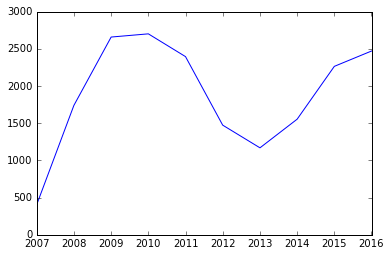

In [58]:
plt.plot(index,voc.groupby("Year").count()["ReceiptDate"])

In [81]:
voc2016 = voc[voc.Year==2016]

In [102]:
voc2016 = voc2016[voc2016["Title"].isnull()==False]

In [103]:
voc2016.count()

CustomSex          255
ReceiptDate       2421
OccurrenceDate    2421
Title             2421
Contents          2421
Year              2421
dtype: int64

In [104]:
myCounter = Counter(voc2016.CustomSex)
myCounter

Counter({nan: 2166, '여': 255})

In [105]:
voc2016.head()

,CustomSex,ReceiptDate,OccurrenceDate,Title,Contents,Year
16313,여,2016-01-05,2016-01-05,병원 예약즘 인터넷으로 하려고 &am..,병원 예약즘 인터넷으로 하려고 &54720더니 등록번호가 틀린걸로 나옵니다.,2016
16314,여,2016-01-05,2016-01-05,병원 이용객들을 위해 셔틀버스를 신..,병원 이용객들을 위해 셔틀버스를 신설해주셨으면 감사하겠습니다.\r\r\r\n\r\r...,2016
16315,여,2016-01-05,2016-01-05,실손 보험료 청구에 필요한 진료비 ..,실손 보험료 청구에 필요한 진료비 계산서를 재발급 받으려고 하는데 어떻게 해야되나요...,2016
16316,여,2016-01-05,2016-01-05,안녕하세요 저는 현재 차이나텔레콤..,안녕하세요 저는 현재 차이나텔레콤 한국지사 엔터프라이즈 팀에 근무하고 있는 염태호 ...,2016
16317,여,2016-01-05,2016-01-05,안녕하세요? 저는 간호학과에 재학중..,안녕하세요? 저는 간호학과에 재학중인 한 대학생 입니다. \r\r\r\n인하대학교병...,2016
